In [235]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import re

In [236]:
#Read excel file into pandas dataframe
df = pd.read_excel((os.path.join(sys.path[0],'food-data.xlsx')))
print(df.head())

             Item Avergae size (units)  Price in September 2021 (pence)  \
0   Vegetable oil               1000ml                              156   
1           Chips                1500g                               99   
2            Milk               2272ml                              117   
3  Chicken breast                 600g                              330   
4             Tea                 125g                               67   

   Price in April 2022 pence)  Price in September 2022 pence)  
0                         178                             258  
1                         110                             137  
2                         127                             152  
3                         350                             363  
4                          97                              97  


In [237]:
df.describe()

,Price in September 2021 (pence),Price in April 2022 pence),Price in September 2022 pence)
count,30.00000,30.000000,30.000000
mean,91.40000,97.633333,107.000000
std,59.72096,61.535234,68.226297
min,30.00000,31.000000,34.000000
25%,59.25000,62.500000,66.000000
50%,76.00000,85.000000,88.000000
75%,92.75000,96.750000,105.750000
max,330.00000,350.000000,363.000000


In [238]:
new_avg_df = df
new_avg_df["Average size raw"] = [int(re.sub("[^0-9]", "", x)) for x in new_avg_df["Avergae size (units)"]]
new_avg_df["Price/Size"] = new_avg_df["Price in September 2022 pence)"]/new_avg_df["Average size raw"]
new_avg_df.sort_values("Price/Size", ascending = False)

,Item,Avergae size (units),Price in September 2021 (pence),Price in April 2022 pence),Price in September 2022 pence),Average size raw,Price/Size
12,Apples,6 pack,83,92,97,6,16.166667
21,Bananas,5 pack,73,75,78,5,15.600000
5,Instant coffee,100g,131,135,155,100,1.550000
10,Ham,200g,160,165,176,200,0.880000
4,Tea,125g,67,97,97,125,0.776000
9,Crisps,150g,73,84,91,150,0.606667
3,Chicken breast,600g,330,350,363,600,0.605000
29,Beef mince,500g,210,200,195,500,0.390000
17,Cheese,255g,89,88,98,255,0.384314
16,Fish Fingers,250g,76,77,87,250,0.348000


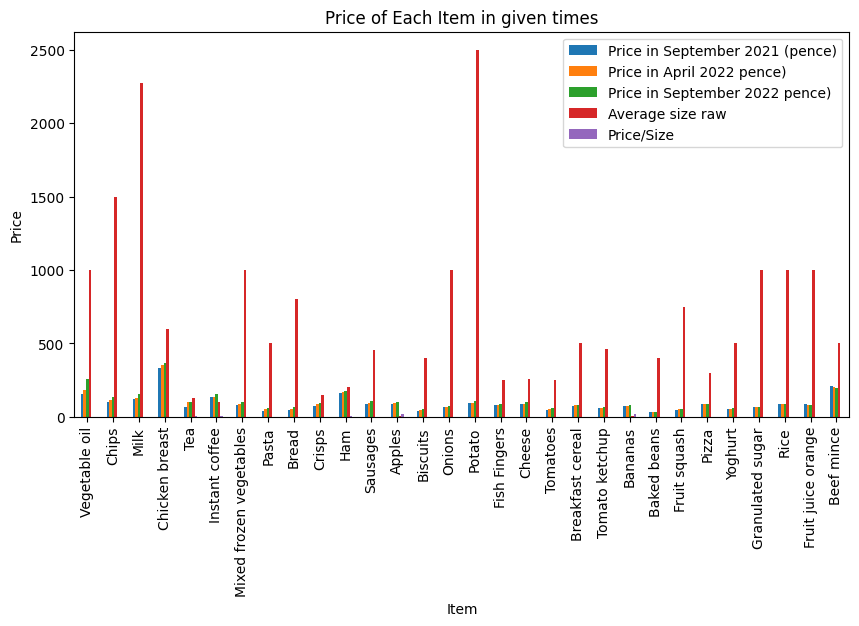

In [239]:
columns = ['Price in September 2021 (pence)', 'Price in April 2022 pence)', 
'Price in September 2022 pence)']

#Plot the line chart
df.plot(x="Item", kind='bar', figsize=(10,5))

#Add x and y axis labels and a title
plt.xlabel('Item')
plt.ylabel('Price')
plt.title('Price of Each Item in given times')

#Show the plot
plt.show()

In [240]:
# df = df.drop(columns=["Item", "Avergae size (units)"])

Price in September 2021 (pence)     2742.000000
Price in April 2022 pence)          2929.000000
Price in September 2022 pence)      3210.000000
Average size raw                   19777.000000
Price/Size                            39.822364
dtype: float64


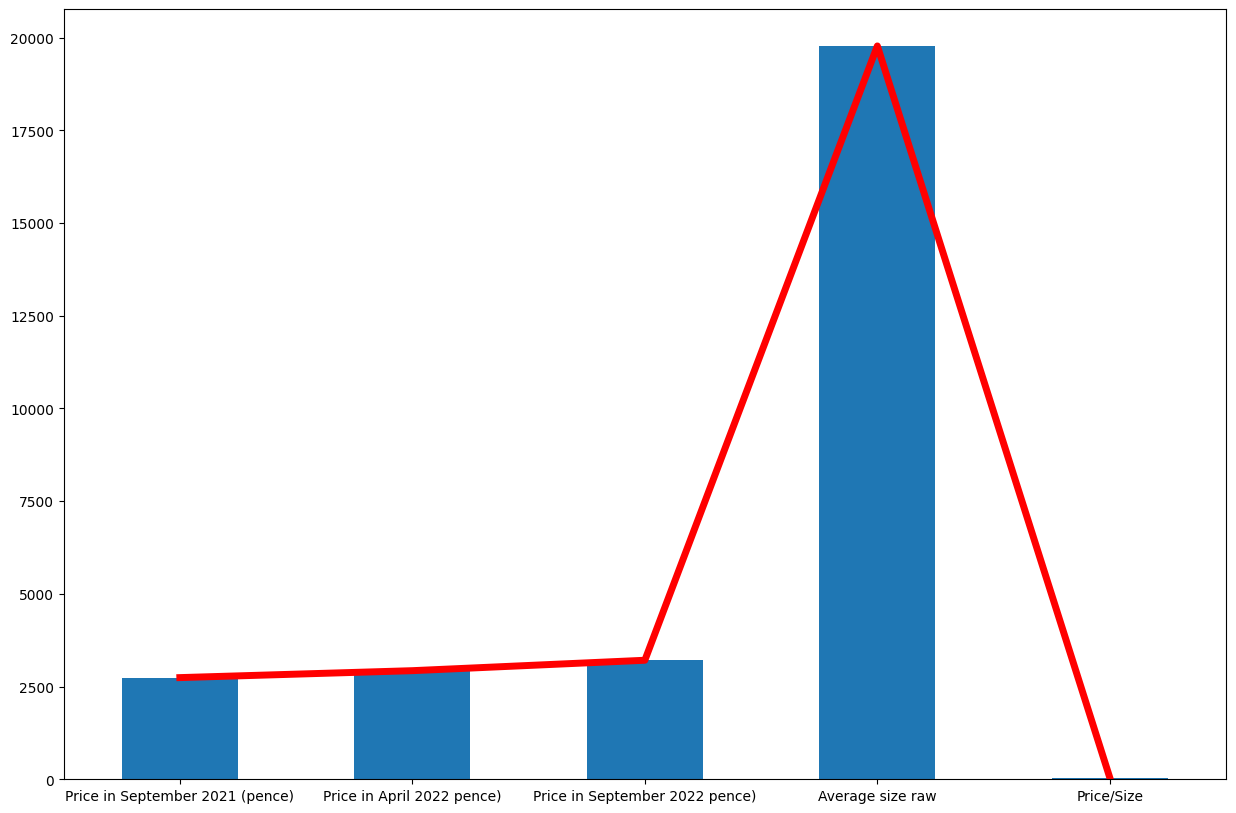

In [241]:
summed = df.sum(numeric_only=True)
print(summed)
summed.plot(figsize=(15,10), kind='bar')
summed.plot(figsize=(15,10), kind='line', color='red', linewidth='5')
plt.show()

In [242]:
group_by = df.groupby('Average size raw')['Average size raw'].count()
print(group_by.sort_values())

Average size raw
5       1
1500    1
800     1
750     1
600     1
460     1
454     1
2272    1
2500    1
255     1
200     1
150     1
125     1
100     1
6       1
300     1
250     2
400     2
500     4
1000    6
Name: Average size raw, dtype: int64


In [251]:
average_increase = (df["Price in September 2022 pence)"].mean() - df["Price in September 2021 (pence)"].mean()) / df["Price in September 2021 (pence)"].mean()
print(f"The average price increase of items from September 2021 to September 2022 is {average_increase:.2%}")
highest_increase = (df["Price in September 2022 pence)"] - df["Price in September 2021 (pence)"]) / df["Price in September 2021 (pence)"]
max_increase = highest_increase[0]
print(f"The item with the highest price increase from September 2021 to September 2022 is {max_increase:.2%}")

The average price increase of items from September 2021 to September 2022 is 17.07%
The item with the highest price increase from September 2021 to September 2022 is 65.38%
